## 实验1 第1题--2022.3.20

In [ ]:
# 2022.3.20

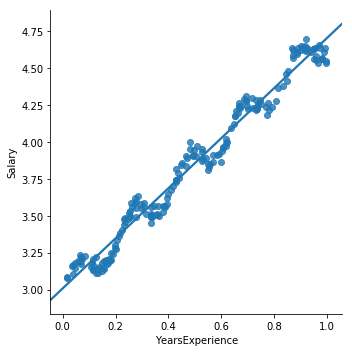

In [4]:
# 导入第三方模块
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 导入数据集
income = pd.read_csv(r'line-ext.csv')
# 绘制散点图
sns.lmplot(x = 'YearsExperience', y = 'Salary', data = income, ci = None)
# 显示图形
plt.show()

In [6]:
# 简单线性回归模型的参数求解
# 样本量
n = income.shape[0]
# 计算自变量、因变量、自变量平方、自变量与因变量乘积的和
sum_x = income.YearsExperience.sum()
sum_y = income.Salary.sum()
sum_x2 = income.YearsExperience.pow(2).sum()
xy = income.YearsExperience * income.Salary
sum_xy = xy.sum()
# 根据公式计算回归模型的参数
w = (sum_xy-sum_x*sum_y/n)/(sum_x2-sum_x**2/n)
b = income.Salary.mean()-w*income.YearsExperience.mean()
# 打印出计算结果
print('回归参数w的值：',w)
print('回归参数b的值：',b)
print('模型表达式：f(x)=',w,'x+',b)
print('\n均方误差：',(w * income.YearsExperience + b - income.Salary).pow(2).sum())
print('\n出当变量 x =0.8452 时，变量 y 的预测值=',w * 0.8452 + b )

回归参数w的值： 1.6953226421712246
回归参数b的值： 3.007743242697588
模型表达式：f(x)= 1.6953226421712246 x+ 3.007743242697588

均方误差： 1.3552490816814906

出当变量 x =0.8452 时，变量 y 的预测值= 4.440629939860707


In [7]:
# 方法2：调用第三方模块statsmodels计算
# 导入第三方模块
import statsmodels.api as sm
# 利用收入数据集，构建回归模型
fit = sm.formula.ols('Salary ~ YearsExperience', data = income).fit()
# 返回模型的参数值
fit.params

Intercept          3.007743
YearsExperience    1.695323
dtype: float64

In [27]:
# 方法3：调用第三方模块sklearn的类LinearRegression计算
from sklearn import linear_model

# 导入数据集
income = pd.read_csv(r'line-ext.csv')  # 默认把第1行作为表头
# print(income.head())

reg = linear_model.LinearRegression()
# print(type(income.YearsExperience))
# print(type(income.Salary))

# 方式1 
a=income.YearsExperience.to_frame()  # 序列转换成数据框
reg.fit(a,income.Salary)

# 方式2
# income = pd.read_csv(r'line-ext.csv',skiprows=1)
# reg.fit(income.iloc[:,0].to_frame(),income.iloc[:,1])

print('截距:',reg.intercept_)
print('斜率:',reg.coef_)
# 系数矩阵就是coef_，截距就是intercept_

a= reg.predict([[0.8452]])
print(a)

截距: 3.0077432426975905
斜率: [1.69532264]
[4.44062994]
